NOME: Artur Porto

Foi escolhida a base de dados "Popularidade de nomes de bebes nos EUA"

Disponível em:

https://www.kaggle.com/datasets/robikscube/us-baby-name-popularity

Temos dois arquivos ao baixar essa base de dados.
O primeiro, "names.csv", contem 4 colunas (name, sex, count, year).


O segundo, "states.csv", contem 7 colunas (state, sex, year, name, count, total, count_normalized).

Descrição dos atributos presentes na base.

Para os dados de Names:
    
*   Name: Nome
*   Sex: Sexo
*  Count: Contagem de ocorrencias do nome por ano
*  Year: Ano



Para os dados de States:
*   **State**:    Estado
*   **Sex**: Sexo
*  **Year**: Ano
*  **Name**: Nome
* **Count**: Contagem de ocorrencias do nome no ano
* **Total**: Contagem de ocorrencias do nome por estado, sexo e ano
* **Count_normalized**: Count/Total

PERGINTAS


*   O nome mais registrado no total também será o mais registrado no estado com mais nome registrados? (impreciso)
*   È possivel ter uma ideia do crescimeto populacional no pais??
*   Item 3



In [ ]:
import numpy as np
import pandas as pd
import statistics as st
import matplotlib.pyplot as plt
from collections import Counter
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from glob import glob

Importando os dados:

In [ ]:
names = pd.read_csv('names.csv')
#states = pd.read_csv('states.csv')

EXPLORAÇÃO INICIAL


Descrição geral da base

In [ ]:
names.shape

(2052781, 4)

2052781 linhas e 4 colunas

In [ ]:
names.columns

Index(['Name', 'Sex', 'Count', 'Year'], dtype='object')

In [ ]:
states.shape

(6337734, 7)

6337734 linhas e 7 colunas

In [ ]:
states.columns

Index(['State', 'Sex', 'Year', 'Name', 'Count', 'Total', 'Count_Normalized'], dtype='object')

In [ ]:
names.isna().mean().round(4).mul(100).sort_values(ascending=False)[:50]

Name     0.0
Sex      0.0
Count    0.0
Year     0.0
dtype: float64

Sem dados em branco/faltando

In [ ]:
states.isna().mean().round(4).mul(100).sort_values(ascending=False)[:50]

State               0.0
Sex                 0.0
Year                0.0
Name                0.0
Count               0.0
Total               0.0
Count_Normalized    0.0
dtype: float64

Sem dados em branco/faltando

Vizualização inicial:

In [ ]:
names.head()

,Name,Sex,Count,Year
0,Emily,F,25735,1997
1,Jessica,F,21044,1997
2,Ashley,F,20895,1997
3,Sarah,F,20712,1997
4,Hannah,F,20594,1997


In [ ]:
states.head()

,State,Sex,Year,Name,Count,Total,Count_Normalized
0,OR,F,1910,Dorothy,57,1373,0.041515
1,OR,F,1910,Mary,54,1373,0.039330
2,OR,F,1910,Helen,48,1373,0.034960
3,OR,F,1910,Ruth,46,1373,0.033503
4,OR,F,1910,Margaret,43,1373,0.031318


Amplitude dos Anos

In [ ]:
ano_states=states['Year']

In [ ]:
ano_names=names['Year']

In [ ]:
Counter(ano_states)

Counter({1910: 16829,
         1911: 17621,
         1912: 23179,
         1913: 25276,
         1914: 28822,
         1915: 33630,
         1916: 34726,
         1917: 35381,
         1918: 36999,
         1919: 36518,
         1920: 37677,
         1921: 38226,
         1922: 37914,
         1923: 37710,
         1924: 38399,
         1925: 37600,
         1926: 37314,
         1927: 37451,
         1928: 36834,
         1929: 35908,
         1930: 36002,
         1931: 34905,
         1932: 35075,
         1933: 34125,
         1934: 34648,
         1935: 34604,
         1936: 34352,
         1937: 34866,
         1938: 35689,
         1939: 35403,
         1940: 36154,
         1941: 36677,
         1942: 38720,
         1943: 39366,
         1944: 38315,
         1945: 37831,
         1946: 41319,
         1947: 43956,
         1948: 43189,
         1949: 43520,
         1950: 43843,
         1951: 44830,
         1952: 45742,
         1953: 46719,
         1954: 47862,
         1

In [ ]:
Counter(ano_names)

Counter({1997: 26972,
         1936: 8893,
         1954: 10984,
         1888: 2651,
         1929: 9823,
         1882: 2127,
         1899: 3042,
         1977: 18183,
         1917: 9912,
         1960: 11925,
         1898: 3264,
         1970: 14782,
         1903: 3389,
         1976: 17400,
         1955: 11127,
         2019: 32073,
         1992: 25428,
         1982: 19700,
         1918: 10398,
         1991: 25115,
         2001: 30281,
         1911: 4867,
         1935: 9038,
         1912: 6351,
         2002: 30568,
         1948: 10241,
         1987: 21411,
         1909: 4227,
         1915: 9357,
         1986: 20660,
         1908: 4018,
         1889: 2590,
         1923: 10643,
         1985: 20091,
         1965: 11955,
         1904: 3560,
         1914: 7965,
         1984: 19510,
         1962: 12214,
         1975: 16950,
         2016: 33043,
         1916: 9696,
         1930: 9792,
         1979: 19043,
         1895: 3049,
         1883: 2084,
         

In [ ]:
a=ano_names. value_counts().sort_index()

<AxesSubplot:>

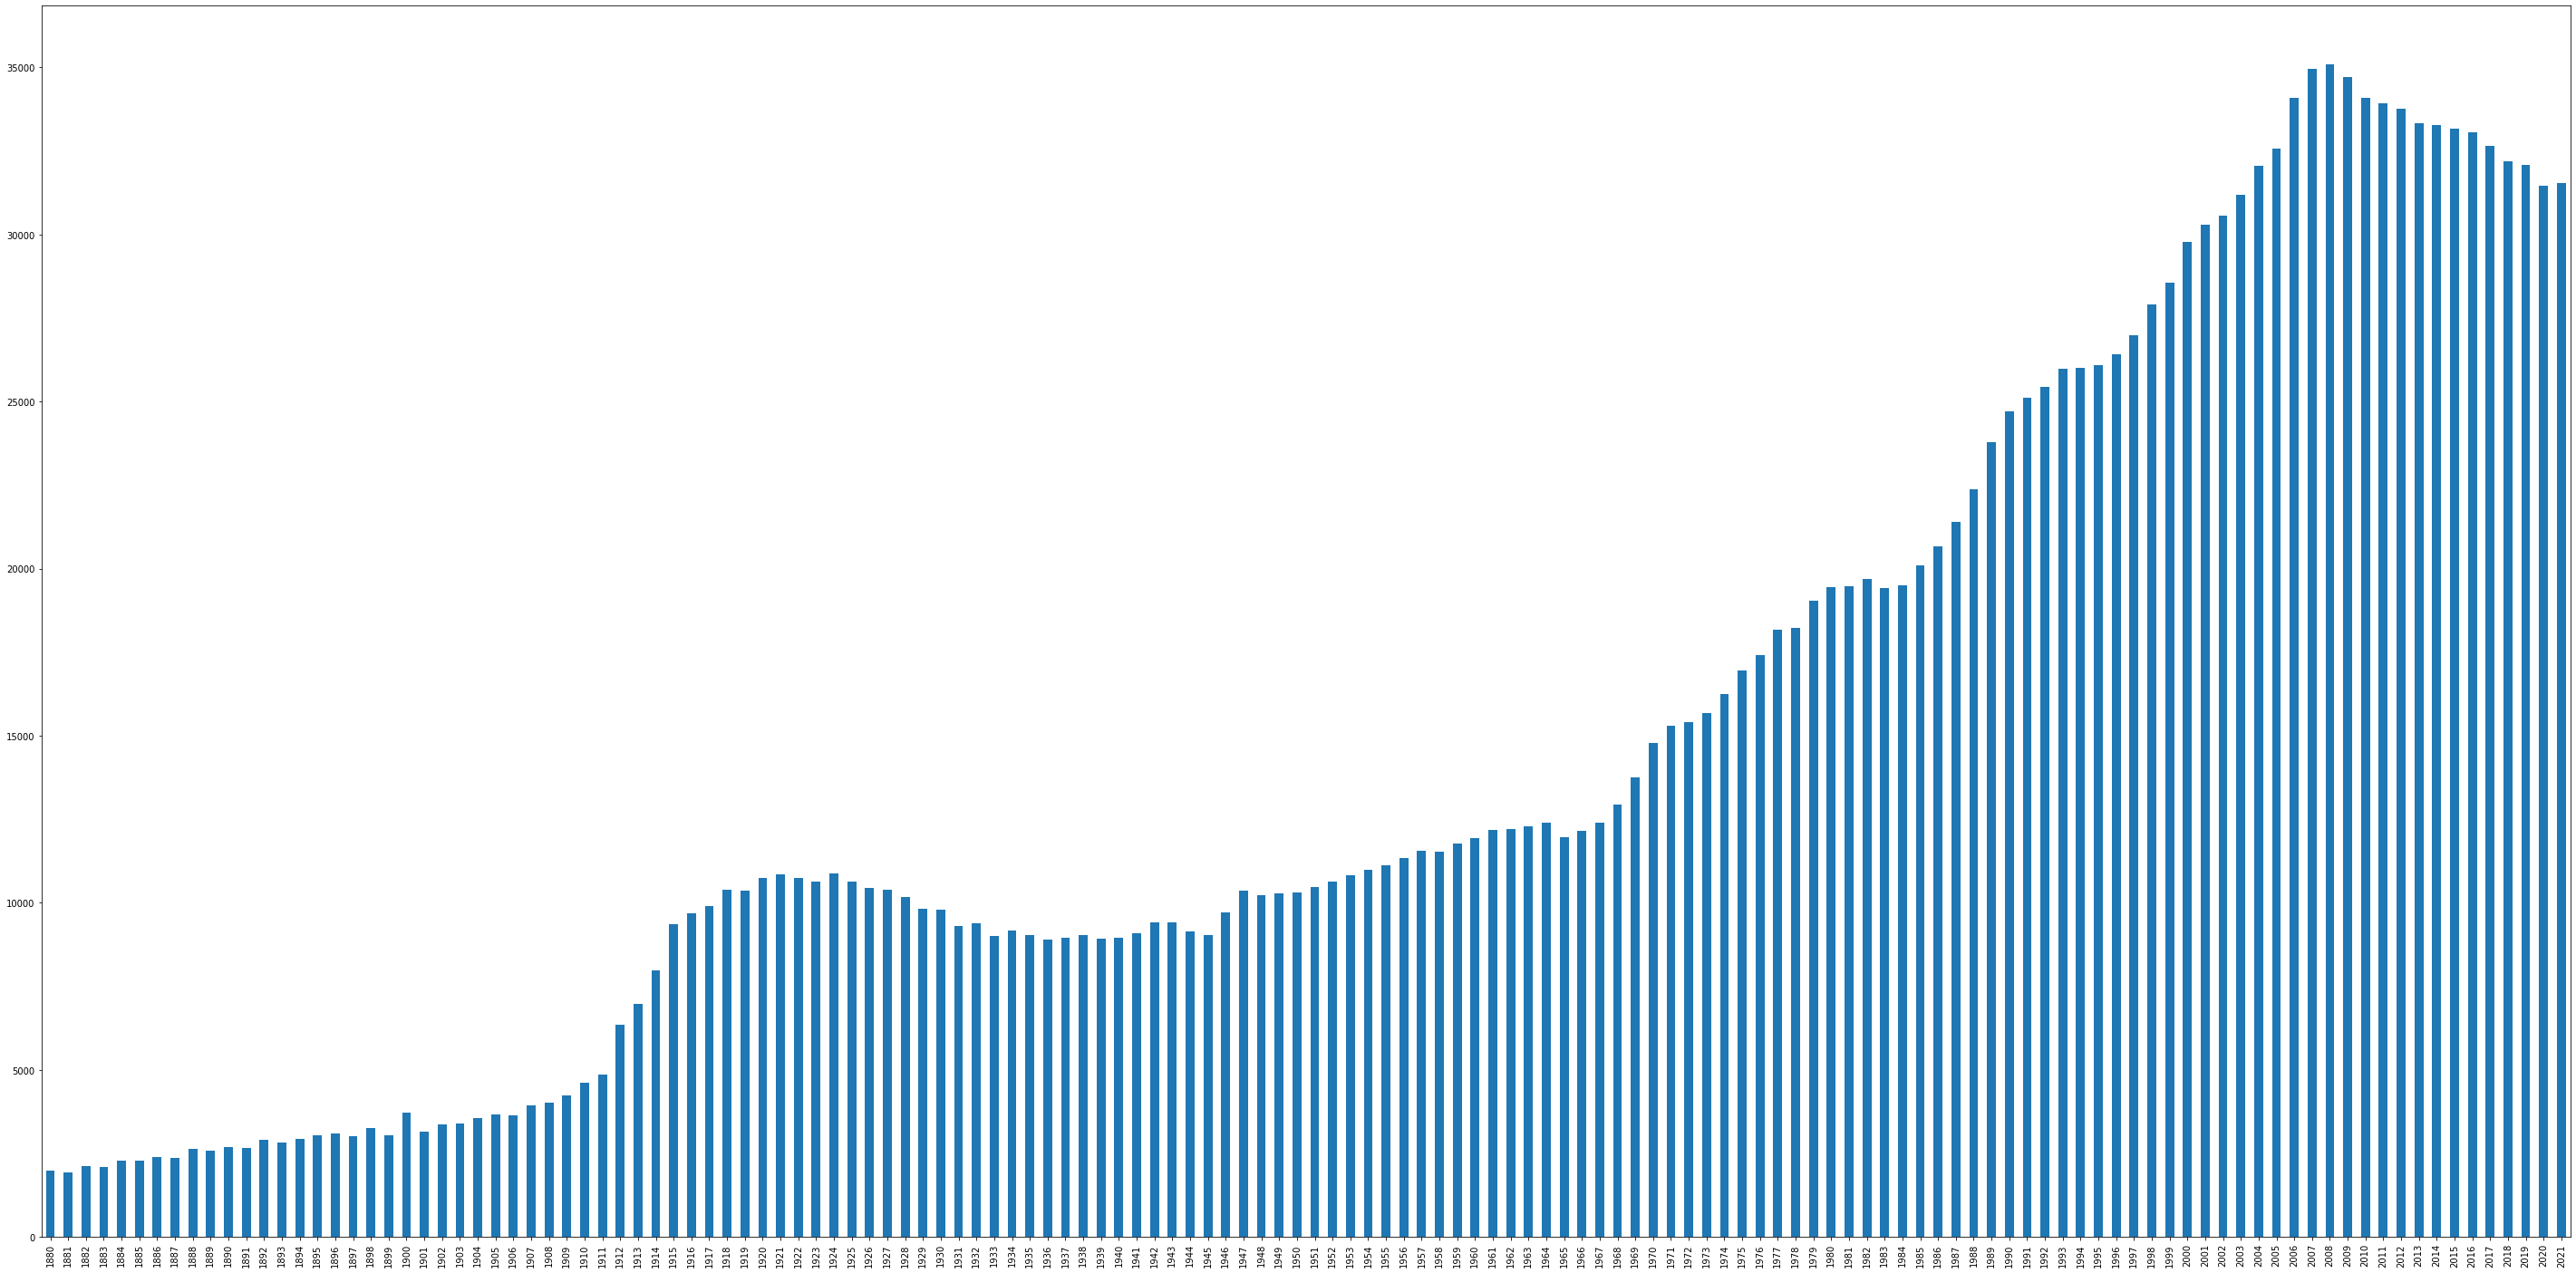

In [ ]:
a.plot.bar(figsize=(50,25))

Ano com mais nomes registrados

In [ ]:
st.mode(list(ano_states))

2008

In [ ]:
st.mode(list(ano_names))

2008

Não esta em concordancia com a vida real: https://www.dadosmundiais.com/america/usa/crescimento-populacao.php

Tem um grafico nesse link, usar e comparar. registrados == nascidos??

Nomes unicos

In [ ]:
nomes=states['Name']
nome_unico_states = nomes.unique()


In [ ]:
nomes=names['Name']
nome_unico_names = nomes.unique()

In [ ]:
nome_unico_names.size

101338

In [ ]:
nome_unico_states.size

33492

Nome que mais aparece

In [ ]:
nomes = states['Name']
nomes.mode()

0    James
dtype: object

In [ ]:
nomes = names['Name']
nomes.mode()

0     Francis
1       James
2        Jean
3       Jesse
4      Jessie
5        John
6     Johnnie
7      Joseph
8         Lee
9      Leslie
10     Marion
11      Ollie
12     Sidney
13     Tommie
14    William
dtype: object

Numero de James

In [ ]:
Filtro_James=names['Name']=='James'
Counter(Filtro_James)

Counter({False: 2052497, True: 284})

In [ ]:
Filtro_James=states['Name']=='James'
Counter(Filtro_James)

Counter({False: 6330281, True: 7453})

Nome feminino que mais aparece

In [ ]:
Filtro_sexo=states['Sex']=='F'
states_filtrado = states[Filtro_sexo]
nome_feminino = states_filtrado['Name']
nome_feminino.mode()

0    Elizabeth
dtype: object

Numero de Elizabeths

In [ ]:
Filtro_Elizabeth=states['Name']=='Elizabeth'
Counter(Filtro_Elizabeth)

Counter({False: 6353816, True: 5922})

Nomes por Estado

In [ ]:
estado=states['State']

Counter({'OR': 92410,
         'WA': 130809,
         'MS': 117316,
         'DE': 33706,
         'MA': 123558,
         'LA': 153712,
         'VT': 29483,
         'SC': 122527,
         'MT': 47144,
         'WY': 28751,
         'GA': 191367,
         'OH': 204165,
         'KS': 97839,
         'TN': 147212,
         'AL': 139293,
         'CA': 400762,
         'WI': 121398,
         'ID': 60445,
         'HI': 56069,
         'KY': 122608,
         'AR': 105373,
         'VA': 154400,
         'NY': 309532,
         'CT': 84948,
         'MO': 144136,
         'ME': 51852,
         'FL': 218192,
         'MN': 119310,
         'SD': 48865,
         'NJ': 159695,
         'NH': 40557,
         'IA': 97515,
         'NV': 50829,
         'NM': 77755,
         'MD': 116699,
         'TX': 368987,
         'IN': 145357,
         'NC': 181647,
         'NE': 74699,
         'PA': 206944,
         'AZ': 122085,
         'WV': 79250,
         'UT': 93764,
         'OK': 121465,
      

In [ ]:
estado.mode()

0    CA
dtype: object

<AxesSubplot:>

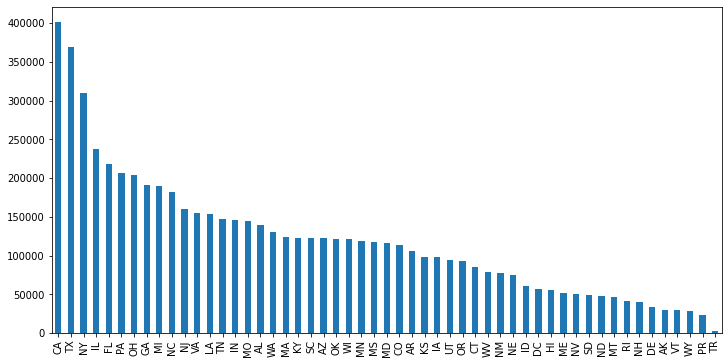

In [ ]:
x = estado.value_counts()

x.plot.bar(figsize=(12,6))

Tem a ver com a população de cada estado. +pop = +nomes

In [ ]:
x.std()

81896.48913148757

In [ ]:
x.var()

6707034932.063862

Nome que mais aparece na CA

CA - estado com mais nomes registrados

In [ ]:
Filtro_CA=states['State']=='CA'
states_filtrado_CA = states[Filtro_CA]
nome_CA = states_filtrado_CA['Name']
nome_CA.mode()

0    Jean
dtype: object

Numero de James em CA

In [ ]:
Filtro_James_CA=states_filtrado_CA['Name']=='James'
Counter(Filtro_James_CA)

Counter({False: 400580, True: 182})

Nomes por sexo:

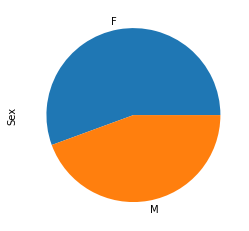

In [ ]:
sexo=states['Sex']
z= sexo.value_counts().plot(kind = 'pie')

Analise por heatmap

In [ ]:
sns.set_style("whitegrid")

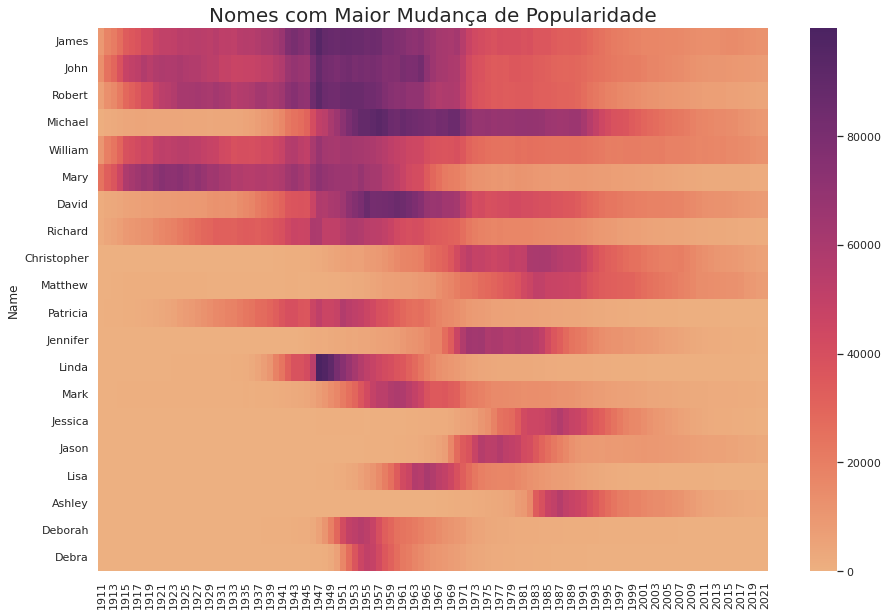

In [ ]:
df = pd.read_csv("names.csv")

sns.set(rc={"figure.figsize": (15, 10)})

df_agg = df.groupby(["Name", "Year"])["Count"].sum().unstack()
df_agg["diff"] = df_agg.max(axis=1) - df_agg.min(axis=1)
top20 = df_agg["diff"].fillna(0).sort_values().tail(20).index
df_subset = (
    df.query("Name in @top20 and Year > 1910")
    .groupby(["Name", "Year"])
    .sum()
    .unstack()
    .copy()
)
names_order = df_subset.sum(axis=1).sort_values(ascending=False).index
df_subset = df_subset.loc[names_order].fillna(0)
df_subset.columns = [c[1] for c in df_subset.columns]
ax = sns.heatmap(df_subset, cmap="flare")
_ = ax.set_title("Nomes com Maior Mudança de Popularidade", fontsize=20)

In [ ]:
plt.style.use("fivethirtyeight")
color_pal = sns.color_palette()

In [ ]:
df = pd.read_csv('names.csv')
states = pd.read_csv('states.csv')

In [ ]:
def plot_name(df, name, genders=["M", "F"]):

    fig, ax = plt.subplots(figsize=(15, 5))
    gender1 = genders[0]
    df.query("Name == @name and Sex == @gender1").set_index("Year").sort_index().plot(
        figsize=(15, 5), ax=ax
    )
    ax.set_title(f"Popularity of The Name: {name}")
    ax.legend().remove()

    if len(genders) == 2:
        ax2 = ax.twinx()
        gender2 = genders[1]
        df.query("Name == @name and Sex == @gender2").set_index(
            "Year"
        ).sort_index().plot(figsize=(15, 5), ax=ax2, color=color_pal[1])
        ax2.legend().remove()
    fig.legend(genders)
    plt.show()

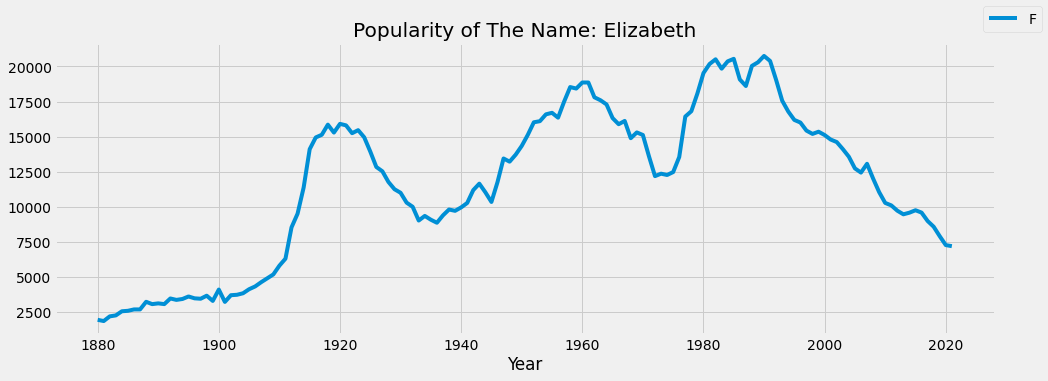

In [ ]:
plot_name(df, "Elizabeth", genders=["F"])

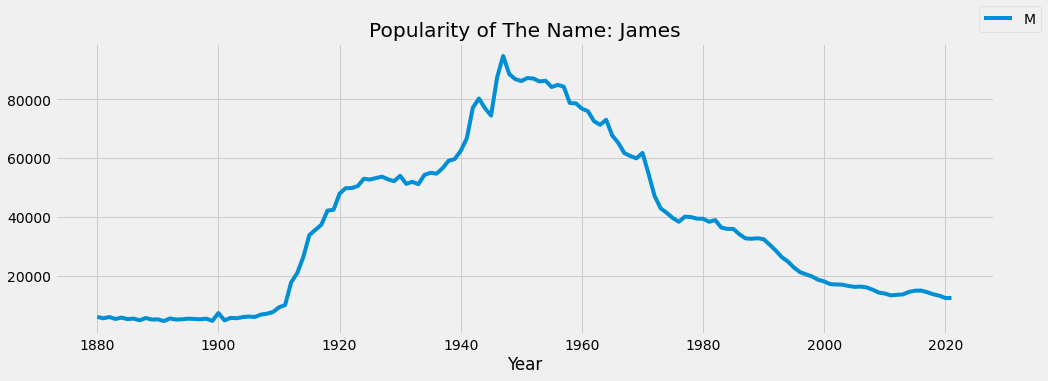

In [ ]:
plot_name(df, "James", genders=["M"])

Notar escalas nos graficos

Sim, eu consigo entender esse código. Ele utiliza as bibliotecas matplotlib, seaborn e pandas para criar um gráfico que mostra a popularidade de um determinado nome ao longo dos anos nos Estados Unidos.

A função plot_name recebe como argumentos um DataFrame df que contém os dados de popularidade dos nomes, um nome específico a ser plotado e uma lista de gêneros (opcional) que pode ser "M" para masculino ou "F" para feminino.

A função começa definindo o estilo de plotagem como fivethirtyeight usando a função plt.style.use. Em seguida, o código carrega dois arquivos CSV contendo os dados de nomes e estados.

Em seguida, a função plot_name cria uma figura (fig) e um objeto de eixos (ax) para plotar os dados do nome escolhido. Em seguida, é definido o gênero a ser plotado com base na lista de gêneros passada como argumento. O código usa o método query para selecionar apenas as linhas do DataFrame df que correspondem ao nome e gênero específicos, classifica os dados pelo ano (Year) e, em seguida, plota o gráfico usando o método plot.

Em seguida, é definido um título para o gráfico com base no nome passado como argumento e a legenda é removida usando o método legend().remove(). Se a lista de gêneros tiver dois elementos, o código cria outro objeto de eixos (ax2) usando o método twinx e plota os dados correspondentes ao segundo gênero usando uma cor diferente. A legenda para o segundo gênero também é removida.

Finalmente, a função cria uma legenda para os gêneros, adiciona a legenda à figura (fig) e exibe o gráfico usando plt.show().

ANALISE DESCRITIVA

UNIVARIADA

In [ ]:
names['Name'].value_counts()

Jean        284
Johnnie     284
Jessie      284
Marion      284
Lee         284
           ... 
Demeatra      1
Getrudes      1
Fordie        1
Flosie        1
Zkye          1
Name: Name, Length: 101338, dtype: int64

In [ ]:
states['Name'].value_counts()

James         7453
Leslie        7418
Lee           7318
John          7267
Robert        7213
              ... 
Morio            1
Seiki            1
Tsuyoshi         1
Yoshikatsu       1
Thyago           1
Name: Name, Length: 33492, dtype: int64

Apos isso ver os nomes que mais apareceram (feito mais acima) e ver se bate com a vida real

Ano, sexo e year ja foi feito uma analise